In [22]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from arch.unitroot import DFGLS
import statsmodels.api as sm

from statsmodels.tsa.stattools import coint


In [23]:
df=pd.read_csv('price_panel_daily.csv',index_col=0)
df

,KRW-BTC,KRW-ETH,KRW-NEO,KRW-MTL,KRW-LTC,KRW-XRP,KRW-ETC,KRW-OMG,KRW-SNT,KRW-WAVES,...,KRW-AXS,KRW-STX,KRW-XEC,KRW-SOL,KRW-MATIC,KRW-NU,KRW-AAVE,KRW-1INCH,KRW-ALGO,KRW-NEAR
2017-09-25 09:00:00,4322000.0,325000.0,28600.0,9800.0,57300.0,203.0,12100.0,11050.0,25.3,4620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-26 09:00:00,4321000.0,321500.0,29300.0,9970.0,58000.0,211.0,12850.0,10850.0,30.2,5350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-27 09:00:00,4657000.0,342500.0,35200.0,10450.0,62800.0,232.0,14250.0,11500.0,31.9,5710.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-28 09:00:00,4586000.0,332500.0,32500.0,9980.0,60100.0,222.0,14500.0,11450.0,31.4,5180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-29 09:00:00,4657000.0,327500.0,31850.0,9520.0,59100.0,220.0,14150.0,10850.0,30.7,5530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26 09:00:00,61467000.0,4917000.0,35760.0,2770.0,188900.0,1120.0,45950.0,8260.0,89.9,19550.0,...,130100.0,2840.0,0.146,239100.0,3475.0,1000.0,324300.0,3340.0,1940.0,19600.0
2021-12-27 09:00:00,61508000.0,4896000.0,35810.0,2845.0,189000.0,1125.0,45710.0,8325.0,90.6,20000.0,...,130100.0,3170.0,0.145,237450.0,3315.0,992.0,335800.0,3405.0,2015.0,17950.0
2021-12-28 09:00:00,58274000.0,4650000.0,33150.0,2595.0,178750.0,1040.0,42820.0,7650.0,86.1,18150.0,...,122200.0,2790.0,0.134,217450.0,3055.0,911.0,309700.0,3115.0,1795.0,16350.0
2021-12-29 09:00:00,57089000.0,4456000.0,32010.0,2475.0,178300.0,1005.0,41890.0,7280.0,84.2,17560.0,...,115200.0,2620.0,0.132,209750.0,3045.0,905.0,289600.0,2975.0,1940.0,18330.0


In [24]:
def E_Gtest(y,x):
    return coint(y,x,maxlag=12)[0]
    

In [25]:
def get_spread(y,x):
    results=sm.OLS(y,x).fit()
    spread=results.resid
    spread=pd.Series(spread,name='spread')
    return spread

공적분 기간과 백테스팅 기간을 나눈다.

In [26]:
df1=df.iloc[0:900,0:2]
df2=df.iloc[900:,0:2]
df1.dropna(inplace=True)
df2.dropna(inplace=True)
df1=df1.astype(float)
df2=df2.astype(float)

Engle and Granger의 1% 임계치는 -2.5899 인데 검청통계량 값은 -3.04598이므로 잔차가 I(0)라고 결론 지을 수 있다.

In [27]:
coint_result=E_Gtest(df1['KRW-BTC'],df1['KRW-ETH'])
print(coint_result)

-3.045981576063622


In [28]:
x=df2['KRW-ETH']
y=df2['KRW-BTC']
result=sm.OLS(y,x).fit()
spread=result.resid
print(spread)

2020-03-13 09:00:00    4.512043e+06
2020-03-14 09:00:00    4.274073e+06
2020-03-15 09:00:00    4.395595e+06
2020-03-16 09:00:00    4.160510e+06
2020-03-17 09:00:00    4.440575e+06
                           ...     
2021-12-26 09:00:00   -1.616121e+07
2021-12-27 09:00:00   -1.578867e+07
2021-12-28 09:00:00   -1.513889e+07
2021-12-29 09:00:00   -1.326108e+07
2021-12-30 09:00:00   -1.393946e+07
Length: 658, dtype: float64


In [29]:
spread=pd.Series(spread,name='spread')
df2=df2.join(spread)
df2

,KRW-BTC,KRW-ETH,spread
2020-03-13 09:00:00,7267000.0,174500.0,4.512043e+06
2020-03-14 09:00:00,6823000.0,161450.0,4.274073e+06
2020-03-15 09:00:00,6909000.0,159200.0,4.395595e+06
2020-03-16 09:00:00,6385000.0,140900.0,4.160510e+06
2020-03-17 09:00:00,6774000.0,147800.0,4.440575e+06
...,...,...,...
2021-12-26 09:00:00,61467000.0,4917000.0,-1.616121e+07
2021-12-27 09:00:00,61508000.0,4896000.0,-1.578867e+07
2021-12-28 09:00:00,58274000.0,4650000.0,-1.513889e+07
2021-12-29 09:00:00,57089000.0,4456000.0,-1.326108e+07


분석의 편의 성을 위하여 잔차들을 scaling 해준다

In [30]:
df2['spread']=(df2['spread'].copy()-df2['spread'].mean())/df2['spread'].std()


In [31]:
threshold1=df2['spread'].std()*2+df2['spread'].mean()
threshold2=df2['spread'].std()*-2+df2['spread'].mean()
print(threshold1)
print(threshold2)

1.9999999999999996
-1.9999999999999991


spread >threshold1 이면 숏, spread < threshold2 이면 롱, spread =0 일 떄 청산이 된다고 하자

In [32]:
df2['position']=np.where(df2['spread']>threshold1,-1,np.nan)
df2['position']=np.where(df2['spread']<threshold2,1,df2['position'])
df2['position']=np.where(df2['spread']*df2['spread'].shift(1)<0,0,df2['position'])


In [33]:
df2.dropna(inplace=True)

In [34]:
df2['position'].value_counts()

-1.0    38
 1.0    12
 0.0     8
Name: position, dtype: int64

In [37]:
df2['f_return']=np.log(df2['KRW-BTC']/df2['KRW-BTC'].shift(1))
df2['s_return']=np.log(df2['KRW-ETH']/df2['KRW-ETH'].shift(1))
df2['t_return']=df2['f_return']+df2['s_return']
df2['strategy']=(df2['f_return']-df2['s_return'])*df2['position'].shift(1)


t_return    198.734225
strategy      1.734237
dtype: float64


<AxesSubplot:>

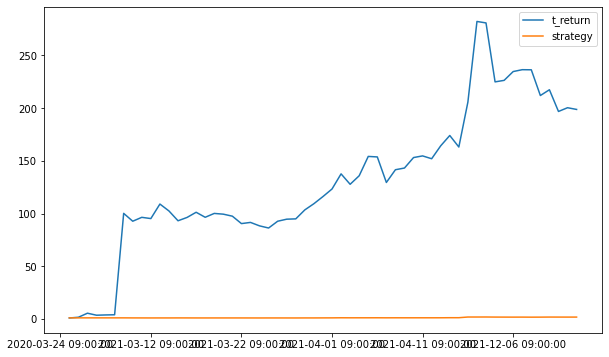

In [38]:
print(df2[['t_return','strategy']].sum().apply(np.exp))
df2[['t_return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))